In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv

In [10]:
with open('Homework2Data597.csv', mode = "r") as qualData:     #Importing data from CSV file
    qualData = csv.reader(qualData)
    qualData = pd.DataFrame(qualData)

qualData = qualData.tail(-1)
mapping = {qualData.columns[21]: 'Depression', qualData.columns[23]: 'Female', qualData.columns[24]: 'Age', qualData.columns[25]: 'Educ', qualData.columns[28]: 'Income', qualData.columns[30]: 'Attend', qualData.columns[29]: 'Married', qualData.columns[31]: 'Unemployed', qualData.columns[27]: 'Black', qualData.columns[26]: 'Hispanic'}
qualData = qualData.rename(columns=mapping)

print(qualData)

         0    1    2    3    4    5    6    7    8    9  ... Hispanic Black  \
1        2  3.0  1.0  2.0  3.0  4.0  2.0  1.0  3.0  3.0  ...      0.0   0.0   
2        3  2.0  2.0  2.0  3.0  2.0  2.0  2.0  3.0  2.0  ...      0.0   0.0   
3        4  3.0  3.0  4.0  2.0  2.0  4.0  2.0  3.0  2.0  ...      0.0   0.0   
4        5  3.0  2.0  3.0  2.0  3.0  1.0  3.0  2.0  3.0  ...      0.0   1.0   
5        6  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0  ...      0.0   0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   ...   
1010  1011  2.0  1.0  4.0  2.0  1.0  4.0  3.0  4.0  4.0  ...      0.0   0.0   
1011  1012  1.0  1.0  2.0  2.0  1.0  1.0  2.0  3.0  2.0  ...      0.0   0.0   
1012  1013  3.0  1.0  3.0  1.0  3.0  2.0  3.0  1.0  1.0  ...      0.0   0.0   
1013  1014  2.0  2.0  2.0  1.0  3.0  3.0  2.0  2.0  2.0  ...      0.0   0.0   
1014  1015  3.0  1.0  1.0  4.0  3.0  3.0  2.0  4.0  3.0  ...      0.0   0.0   

     Income Married Attend Unemployed          32  

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#X = qualData[["depression", "female", "age", "educ", "income", "attend", "married", "unemployed", "black", "hispanic"]]

#X = qualData[[21, 23, 24, 25, 28, 30, 29, 31, 27, 26]]   #Selecting columns
X = qualData[["Depression", "Female", "Age", "Educ", "Income", "Attend", "Married", "Unemployed", "Black", "Hispanic"]]
y = qualData[[22]] #Voter turnout is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)   #Split Data

sc = StandardScaler()                  #Scale Data
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [4]:
lr = LogisticRegression()                                #Logistic Regression
y_train = np.ravel(y_train)
lr.fit(X_train_std, y_train)

print("Logistic Regression Training Accuracy:", lr.score(X_train_std, y_train))

from sklearn.svm import SVC                                       #SVM
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_train_std, y_train)

print("SVM Training Training Accuracy:", svm.score(X_train_std, y_train))

from sklearn.ensemble import RandomForestClassifier                        #Random Forest
forest = RandomForestClassifier(n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)                                              #Works really well when not scaled()

print("Random Forest Training Accuracy:", forest.score(X_train, y_train))

lrr = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear', multi_class = 'ovr') #Lasso
y_train = np.ravel(y_train)
lrr.fit(X_train_std, y_train)

print("Regularized Logistic Regression Training Accuracy:", lrr.score(X_train_std, y_train))


Logistic Regression Training Accuracy: 0.7080394922425952
SVM Training Training Accuracy: 0.8631875881523272
Random Forest Training Accuracy: 0.998589562764457
Regularized Logistic Regression Training Accuracy: 0.7066290550070522


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data                         Logistic Regression
y_pred = lr.predict(X_test_std)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLogistic Regression:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Make predictions on the test data                         SVM
y_pred = svm.predict(X_test_std)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nSVM Regression:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Make predictions on the test data                        Random Forest
y_pred = forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRandom Forest:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Make predictions on the test data                       Regularized Logistic Regression
y_pred = lrr.predict(X_test_std)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRegularized Logistic Regression:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")



Logistic Regression:
Mean Squared Error: 0.29
R-squared: -0.26

SVM Regression:
Mean Squared Error: 0.29
R-squared: -0.26

Random Forest:
Mean Squared Error: 0.32
R-squared: -0.44

Regularized Logistic Regression:
Mean Squared Error: 0.28
R-squared: -0.25


[-0.00393443  0.01245902  0.08        0.02295082  0.00459016 -0.00196721
 -0.00065574  0.00065574 -0.00459016 -0.00262295]


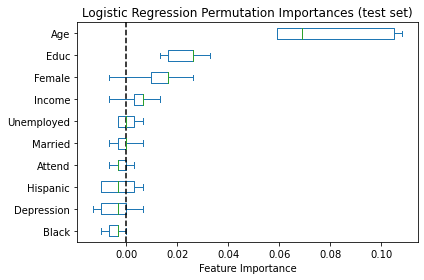

In [6]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(lr, X_test_std, y_test)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)


#Plot the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)

LRP = importances.plot.box(vert=False, whis=10)
LRP.set_title("Logistic Regression Permutation Importances (test set)")
LRP.axvline(x=0, color="k", linestyle="--")
LRP.set_xlabel("Feature Importance")
LRP.figure.tight_layout()

[-0.01639344  0.01508197  0.07213115  0.04721311  0.02819672  0.01639344
  0.02163934  0.00721311  0.0104918   0.02098361]


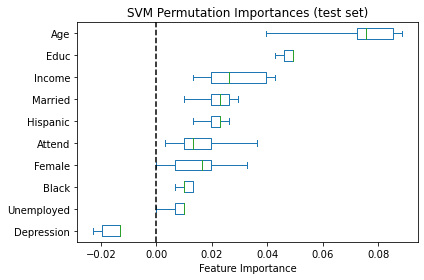

In [7]:
# Calculate permutation importance
perm_importance = permutation_importance(svm, X_test_std, y_test)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)


#Plot the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)

LRP = importances.plot.box(vert=False, whis=10)
LRP.set_title("SVM Permutation Importances (test set)")
LRP.axvline(x=0, color="k", linestyle="--")
LRP.set_xlabel("Feature Importance")
LRP.figure.tight_layout()

[-0.01508197  0.00786885  0.06229508  0.03934426 -0.00786885 -0.01245902
 -0.01377049 -0.00459016 -0.00262295 -0.00131148]


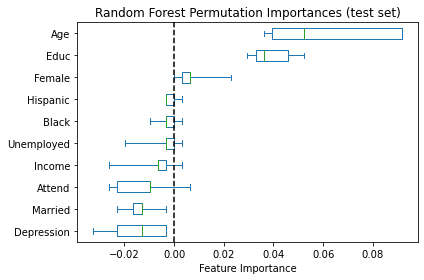

In [8]:
# Calculate permutation importance
perm_importance = permutation_importance(forest, X_test, y_test)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)


#Plot the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)

LRP = importances.plot.box(vert=False, whis=10)
LRP.set_title("Random Forest Permutation Importances (test set)")
LRP.axvline(x=0, color="k", linestyle="--")
LRP.set_xlabel("Feature Importance")
LRP.figure.tight_layout()

[ 0.00065574  0.00262295  0.09901639  0.01377049  0.00590164  0.00983607
  0.00393443 -0.00131148 -0.00196721 -0.00196721]


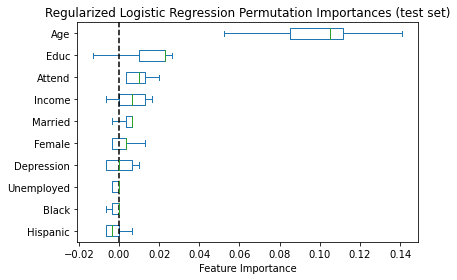

In [9]:
# Calculate permutation importance
perm_importance = permutation_importance(lrr, X_test_std, y_test)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)


#Plot the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)

LRP = importances.plot.box(vert=False, whis=10)
LRP.set_title("Regularized Logistic Regression Permutation Importances (test set)")
LRP.axvline(x=0, color="k", linestyle="--")
LRP.set_xlabel("Feature Importance")
LRP.figure.tight_layout()